In [8]:
import pandas as pd

# Dosya yolunu belirt
dosya_yolu = r'C:\Users\mrttkn\Desktop\train.csv'

# Dosyayı oku
df = pd.read_csv(dosya_yolu)

# Veriyi göster
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Veri setinin boyutları: (891, 12)
Veri setinin sütun isimleri: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Temel istatistikler:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min 

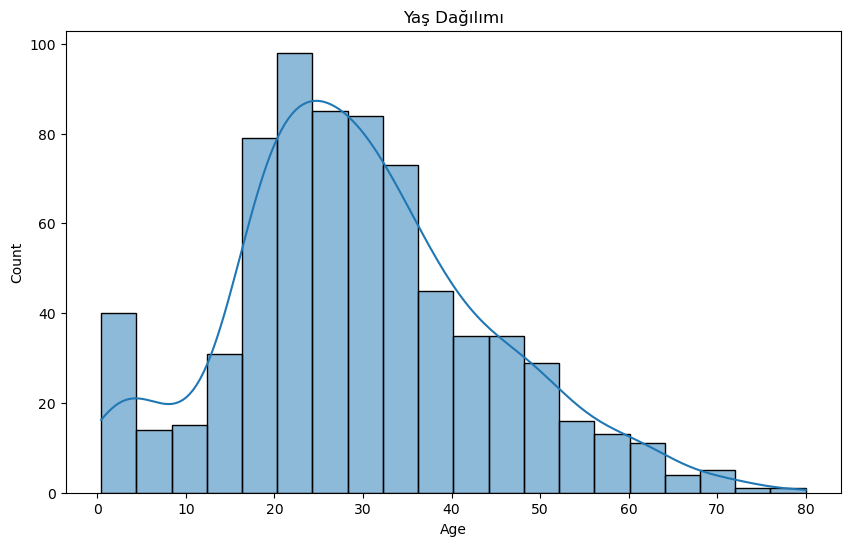

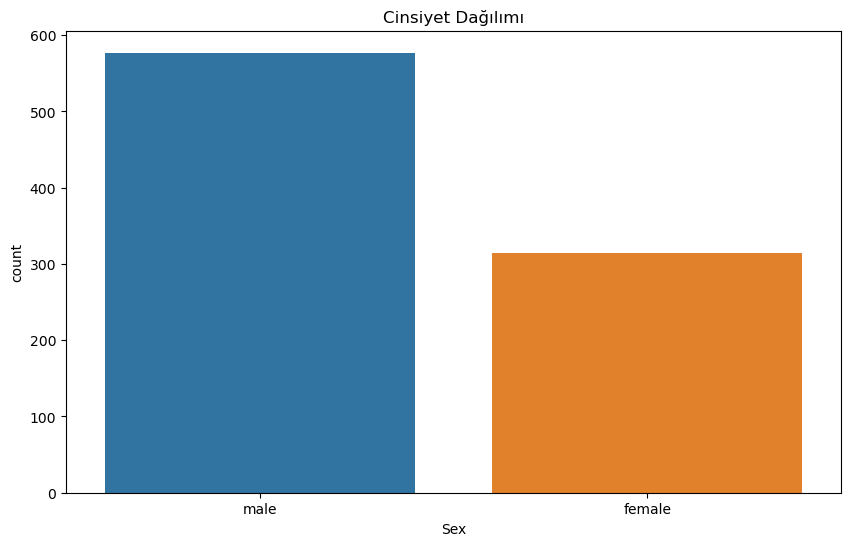

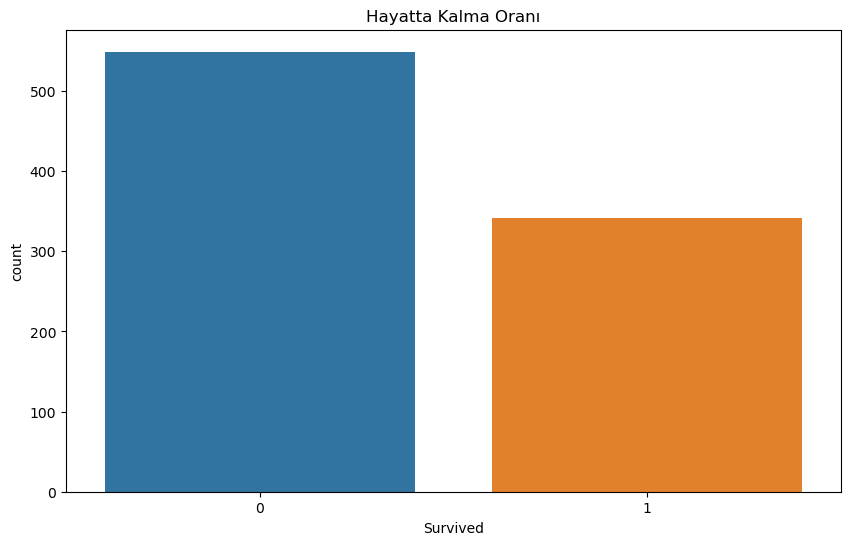

In [9]:
# Veri setinin boyutları
print(f"Veri setinin boyutları: {df.shape}")

# Veri setinin sütun isimleri
print(f"Veri setinin sütun isimleri: {df.columns}")

# Temel istatistikler
print("Temel istatistikler:")
print(df.describe())

# Eksik değerlerin kontrolü
print("Eksik değerler:")
print(df.isnull().sum())

# Veri dağılımlarını görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Yaş dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Yaş Dağılımı')
plt.show()

# Cinsiyet dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.title('Cinsiyet Dağılımı')
plt.show()

# Hayatta kalma oranı
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Hayatta Kalma Oranı')
plt.show()

In [3]:
# Eksik değerlerin doldurulması
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Kategorik değişkenlerin sayısal hale getirilmesi
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Gereksiz sütunların çıkarılması
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Girdi ve çıktı değişkenlerinin belirlenmesi
X = df.drop('Survived', axis=1)
y = df['Survived']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Modeli")
print(f"Doğruluk: {accuracy_score(y_test, rf_predictions)}")
print(classification_report(y_test, rf_predictions))

# Logistic Regression modeli
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Modeli")
print(f"Doğruluk: {accuracy_score(y_test, lr_predictions)}")
print(classification_report(y_test, lr_predictions))

# KNN Classifier modeli
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("KNN Classifier Modeli")
print(f"Doğruluk: {accuracy_score(y_test, knn_predictions)}")
print(classification_report(y_test, knn_predictions))

Random Forest Modeli
Doğruluk: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Logistic Regression Modeli
Doğruluk: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

KNN Classifier Modeli
Doğruluk: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy             

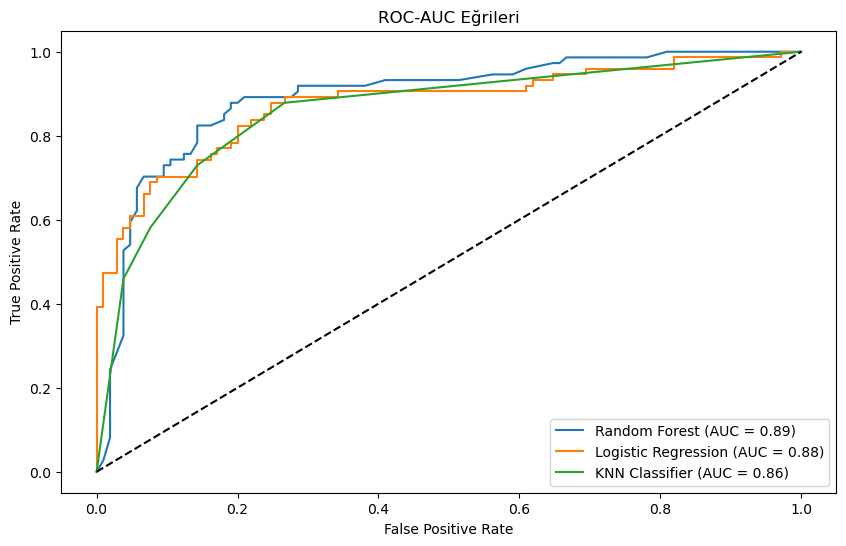

In [5]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC eğrileri
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
knn_roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN Classifier (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Eğrileri')
plt.legend(loc='lower right')
plt.show()